Saving IMG-20190623-WA0003.jpg to IMG-20190623-WA0003.jpg


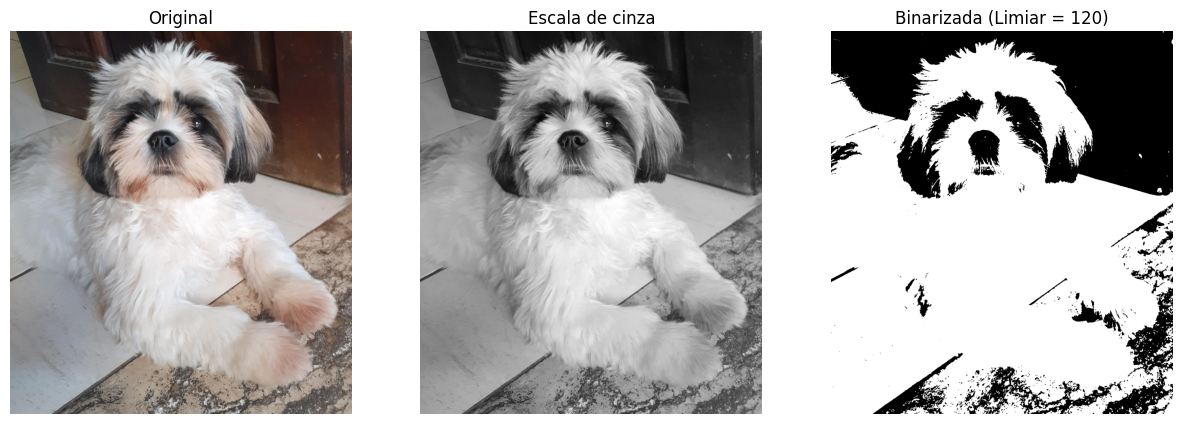

In [2]:
# --- Instalação de bibliotecas necessárias ---
!pip install pillow matplotlib numpy

# --- Importações ---
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload da imagem ---
uploaded = files.upload()  # Escolha a imagem do seu computador
image_name = list(uploaded.keys())[0]

# --- Funções ---
def rgb_to_grayscale(arr):
    """
    Converte imagem RGB para escala de cinza usando o método da luminosidade:
    gray = 0.299 R + 0.587 G + 0.114 B
    """
    r = arr[..., 0].astype(np.float32)
    g = arr[..., 1].astype(np.float32)
    b = arr[..., 2].astype(np.float32)
    gray = 0.299 * r + 0.587 * g + 0.114 * b
    return np.clip(gray, 0, 255).astype(np.uint8)

def otsu_threshold(gray):
    """
    Calcula limiar ótimo usando o método de Otsu.
    """
    hist, _ = np.histogram(gray.flatten(), bins=256, range=(0,256))
    total = hist.sum()
    prob = hist / total
    omega = np.cumsum(prob)
    mu = np.cumsum(prob * np.arange(256))
    mu_t = mu[-1]
    sigma_b_squared = (mu_t * omega - mu)**2 / (omega * (1 - omega) + 1e-12)
    return int(np.argmax(sigma_b_squared))

def binarize(gray, threshold):
    """
    Binariza a imagem (0 ou 255) usando o limiar dado.
    """
    return np.where(gray > threshold, 255, 0).astype(np.uint8)

# --- Processamento ---
img = Image.open(image_name).convert("RGB")
arr = np.array(img)

gray = rgb_to_grayscale(arr)
thresh = otsu_threshold(gray)
binary = binarize(gray, thresh)

# --- Exibição ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")
plt.title("Escala de cinza")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(binary, cmap="gray")
plt.title(f"Binarizada (Limiar = {thresh})")
plt.axis("off")

plt.show()
